# 1 - CONFIGURAÇÕES INICIAIS

## 1.1. IMPORTS

In [112]:
import warnings
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
from IPython.core.display       import HTML
from IPython.display            import Image
from matplotlib                 import ticker
from sklearn.model_selection    import LeaveOneOut
from sklearn                    import manifold as MDS
from sklearn.model_selection    import cross_val_score
from sklearn.model_selection    import train_test_split
from sklearn.linear_model       import LinearRegression
from numpy                      import mean, absolute, sqrt
from sklearn.linear_model       import Ridge, Lasso, ElasticNet
from sklearn.preprocessing      import RobustScaler, MinMaxScaler

## 1.2. GRÁFICOS E NÚMEROS

In [113]:
# Configura os gráficos
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    # Ignorar os warnings
    warnings.filterwarnings("ignore")

    sns.set()
jupyter_settings()

## 1.3. CARREGANDO OS DADOS
## Dataset do site Kaggle: "https://www.kaggle.com/datasets/camnugent/california-housing-prices"

In [114]:
df1 = pd.read_csv('housing.csv')

# 2 - EXTRAÇÃO, CARGA E TRANSFORMAÇÃO DOS DADOS

## 2.1. Renomeando as colunas

In [115]:
col_new = [
    'long', 'lat', 'age', 'rooms', 'bedrooms', 'population', 
    'households', 'income', 'value', 'ocean_proximity'
    ]
df1.columns = col_new

## 2.2. DIMENSÕES DOS DADOS

In [116]:
print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de colunas: {df1.shape[1]}')

Número de linhas: 20640
Número de colunas: 10


## 2.3. CHECANDO E TRATANDO DADOS FALTANTES

In [117]:
df1 = df1.dropna()
df1.isna().sum()

long               0
lat                0
age                0
rooms              0
bedrooms           0
population         0
households         0
income             0
value              0
ocean_proximity    0
dtype: int64

## 2.4. CHECANDO OS TIPOS DOS DADOS

In [118]:
df1.dtypes

long               float64
lat                float64
age                float64
rooms              float64
bedrooms           float64
population         float64
households         float64
income             float64
value              float64
ocean_proximity     object
dtype: object

## 2.5. ALTERANDO OS TIPOS DE DADOS

In [119]:
df1.age = df1.age.astype('int32')
df1.rooms = df1.rooms.astype('int32')
df1.bedrooms = df1.bedrooms.astype('int32')
df1.population = df1.population.astype('int32')
df1.households = df1.households.astype('int32')
df1.income = round(df1.income.astype('float32'), 2)
df1.value = round(df1.value.astype('float32'), 2)
df1.lat = df1.lat.astype('float32')
df1.long = df1.long.astype('float32')

# 3 - VERIFICANDO AS DISTRIBUIÇÕES E PREPARANDO A BASE

## 3.1. ELIMINANDO REDUNDÂNCIA

In [120]:
df2 = df1.drop(columns=['ocean_proximity', 'lat', 'long'])

## 3.2. VERIFICANDO OS OUTLIERS


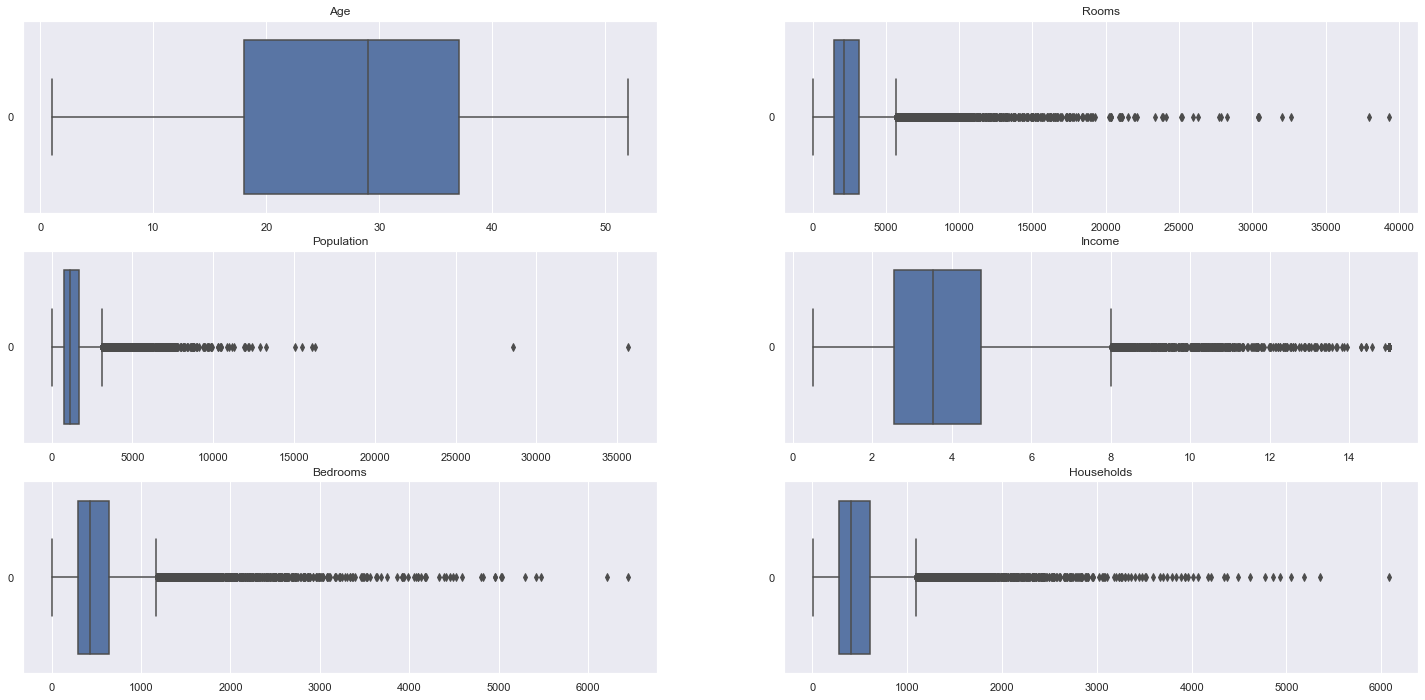

In [121]:
plt.subplot(3, 2, 1)
sns.boxplot(data=df2.age, orient="h").set_title('Age');

plt.subplot(3, 2, 2)
sns.boxplot(data=df2.rooms, orient="h").set_title('Rooms');

plt.subplot(3, 2, 3)
sns.boxplot(data=df2.population, orient="h").set_title('Population');

plt.subplot(3, 2, 4)
sns.boxplot(data=df2.income, orient="h").set_title('Income');

plt.subplot(3, 2, 5)
sns.boxplot(data=df2.bedrooms, orient="h").set_title('Bedrooms');

plt.subplot(3, 2, 6)
sns.boxplot(data=df2.households, orient="h").set_title('Households');


## 3.3. MUDANDO A ESCALA DAS FEATURES

In [122]:
ms = MinMaxScaler() # poucos outliers
rs = RobustScaler() # muitos outliers

df2.age = ms.fit_transform(df2[['age']].values)
df2.rooms = rs.fit_transform(df2[['rooms']].values)
df2.population = rs.fit_transform(df2[['population']].values)
df2.income = rs.fit_transform(df2[['income']].values)
df2.households = rs.fit_transform(df2[['households']].values)
df2.bedrooms = rs.fit_transform(df2[['bedrooms']].values)

## 3.4. VERIFICANDO A DISTRIBUIÇÃO DA VARIÁVEL RESPOSTA

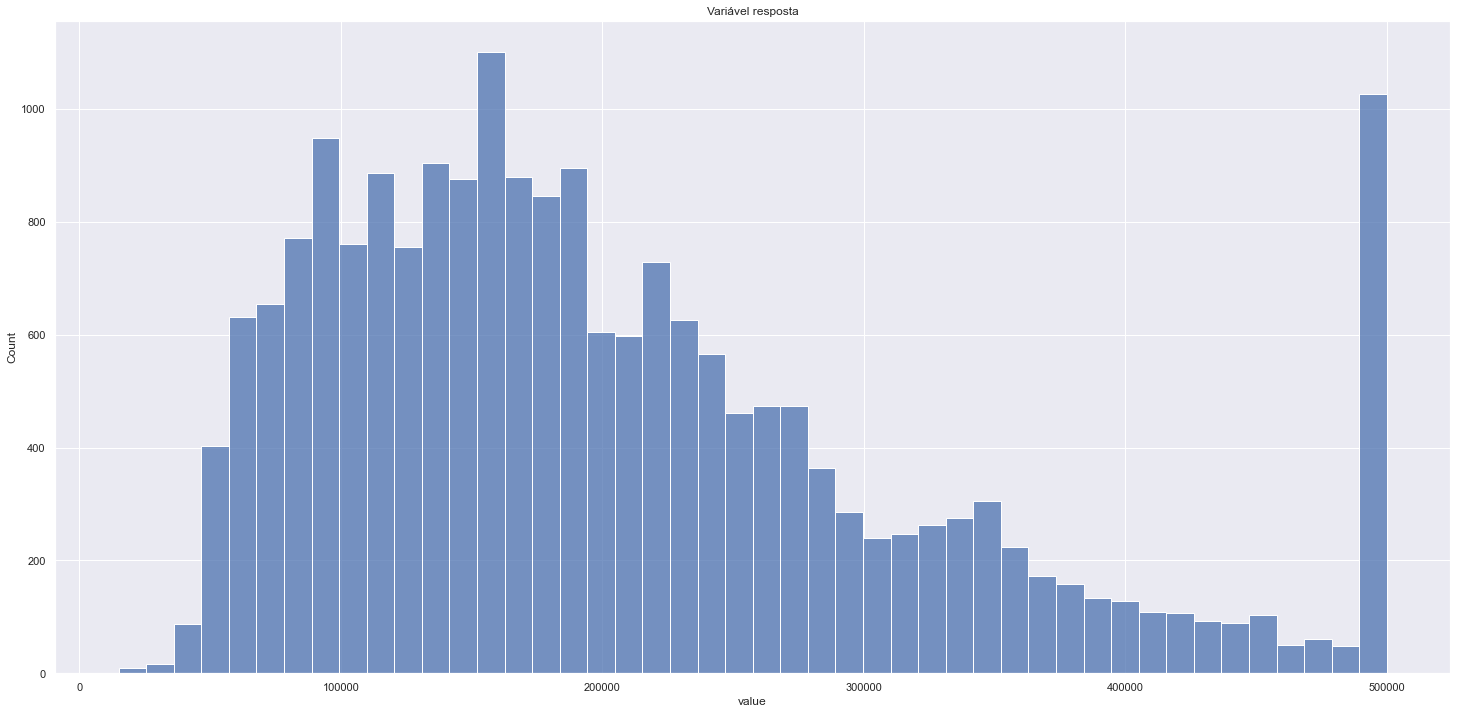

In [123]:
sns.histplot(df2.value).set_title('Variável resposta');

## 3.5. AJUSTANDO A DISTRIBUIÇÃO DA VARIÁVEL RESPOSTA

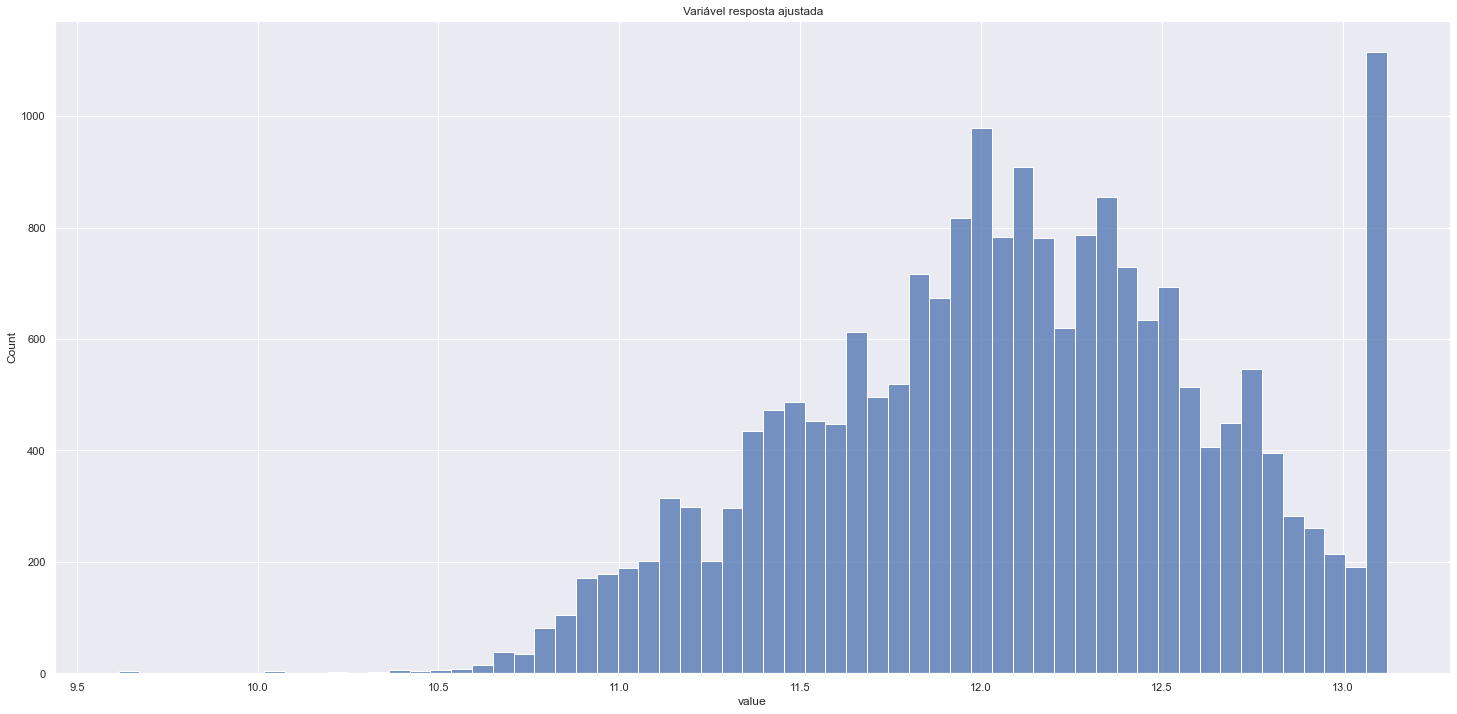

In [124]:
df2['value'] = np.log1p(df2.value)
sns.histplot(df2.value).set_title('Variável resposta ajustada');

## 3.6. DIVIDINDO O DATASET EM TREINO E TESTE

In [125]:
x_train, x_test, y_train, y_test = train_test_split(
    df2.drop(columns=['value']), df2['value'],
    test_size = 0.25)

# 4 - APLICANDO OS MODELOS

## 4.1. REGRESSÃO LINEAR

In [126]:
# Tabela de comparação dos modelos
reg_metrics = pd.DataFrame(columns=['Modelo', 'MSE'])

# Aplicando regressão linear
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Gerando a predição na porção de teste 
lreg_y_pred = lreg.predict(x_test)

# Calculando o MSE (Erro médio quadrado) 
lr_mse = np.mean((lreg_y_pred - y_test)**2)

reg_metrics.loc[len(reg_metrics), reg_metrics.columns] = 'Regressão', lr_mse

## 4.2. RIDGE REGRESSION

In [127]:
# Aplicando regressão Ridge
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# Calculando o MSE (Erro médio quadrado) 
ridge_mse = np.mean((y_pred - y_test)**2)
 
reg_metrics.loc[len(reg_metrics), reg_metrics.columns] = 'Ridge', ridge_mse

## 4.3. LASSO REGRESSION

In [128]:
# Aplicando regressão Lasso
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculando o MSE (Erro médio quadrado) 
lasso_mse = np.mean((y_pred1 - y_test)**2)

reg_metrics.loc[len(reg_metrics), reg_metrics.columns] = 'Lasso', lasso_mse

## 4.4. ELASTICNET

In [129]:
# Aplicando Elasticnet
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
y_pred_elastic = e_net.predict(x_test)

# Calculando o MSE (Erro médio quadrado) 
enet_mse = np.mean((y_pred_elastic - y_test)**2)

reg_metrics.loc[len(reg_metrics), reg_metrics.columns] = 'ElasticNet', enet_mse

# 5 - APLICANDO OS MODELOS COM CROSS VALIDATION (LEAVE ONE OUT)

In [130]:
# Acrescenta coluna de RMSE na tabela de comparação dos modelos
reg_metrics['RMSE - LEAVE ONE OUT'] = 0

# Instancia o método para o cross validation
leave = LeaveOneOut()

## 5.1. REGRESSÃO LINEAR (LEAVE ONE OUT)

In [131]:
# Aplicando Regressão Linear
model = LinearRegression()

# Aplicando o Cross Validation (Leave One Out)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error',
                         cv=leave, n_jobs=-1)

# Calculando o RMSE  
lr_rmse = sqrt(mean(absolute(scores)))

reg_metrics.loc[0, 'RMSE - LEAVE ONE OUT'] = lr_rmse

## 5.2. REGRESSÃO RIDGE (LEAVE ONE OUT)

In [132]:
# Aplicando regressão Ridge
ridgeR = Ridge(alpha = 1)

# Aplicando o Cross Validation (Leave One Out)
scores = cross_val_score(ridgeR, x_train, y_train, scoring='neg_mean_squared_error',
                         cv=leave, n_jobs=-1)
 
# Calculando o RMSE  
ridge_mse = sqrt(mean(absolute(scores)))

reg_metrics.loc[1, 'RMSE - LEAVE ONE OUT'] = ridge_mse

## 5.3. REGRESSÃO LASSO (LEAVE ONE OUT)

In [133]:
# Aplicando regressão Lasso
lasso = Lasso(alpha = 1)

# Aplicando o Cross Validation (Leave One Out)
scores = cross_val_score(lasso, x_train, y_train, scoring='neg_mean_squared_error',
                         cv=leave, n_jobs=-1)
 
# Calculando o RMSE  
lasso_mse = sqrt(mean(absolute(scores)))

reg_metrics.loc[2, 'RMSE - LEAVE ONE OUT'] = lasso_mse

## 5.4. ELASTICNET (LEAVE ONE OUT)

In [134]:
# Aplicando Elasticnet
e_net = ElasticNet(alpha = 1)

# Aplicando o Cross Validation (Leave One Out)
scores = cross_val_score(e_net, x_train, y_train, scoring='neg_mean_squared_error',
                         cv=leave, n_jobs=-1)
 
# Calculando o RMSE  
enet_mse = sqrt(mean(absolute(scores)))

reg_metrics.loc[3, 'RMSE - LEAVE ONE OUT'] = enet_mse

# 6 - COMPARAÇÃO DOS MODELOS

## 6.1. TABELA COMPARATIVA

In [135]:
display(reg_metrics)

,Modelo,MSE,RMSE - LEAVE ONE OUT
0,Regressão,0.1521,0.3974
1,Ridge,0.1521,0.3974
2,Lasso,0.3233,0.5694
3,ElasticNet,0.3233,0.5694


## 6.2. PLOT ERRO MÉDIO QUADRADO (MSE)

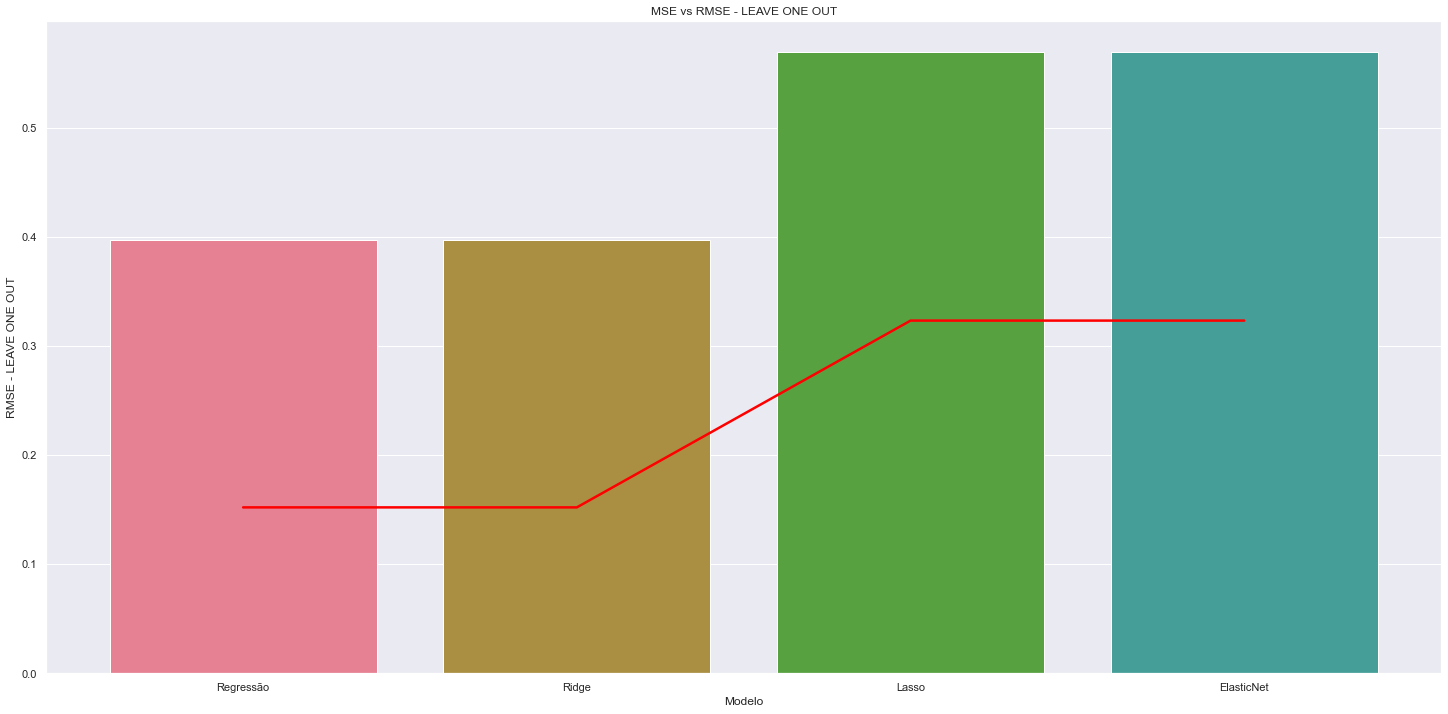

In [136]:
sns.set_palette("husl")
sns.barplot(x='Modelo', y='RMSE - LEAVE ONE OUT', data=reg_metrics);
sns.lineplot(x='Modelo', y='MSE', data=reg_metrics, linewidth=2.5, color='red' ).set_title('MSE vs RMSE - LEAVE ONE OUT');
